In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
            path_XYs.append(XYs)
    return path_XYs

In [3]:
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Task1: Regularization

In [4]:
def plot_shape(csv_path):
    csv_curve = read_csv(csv_path)
    plot(csv_curve)
    print("Number of curves:", len(csv_curve))

## Part1: Isolated shapes (each shape is one single polyline)

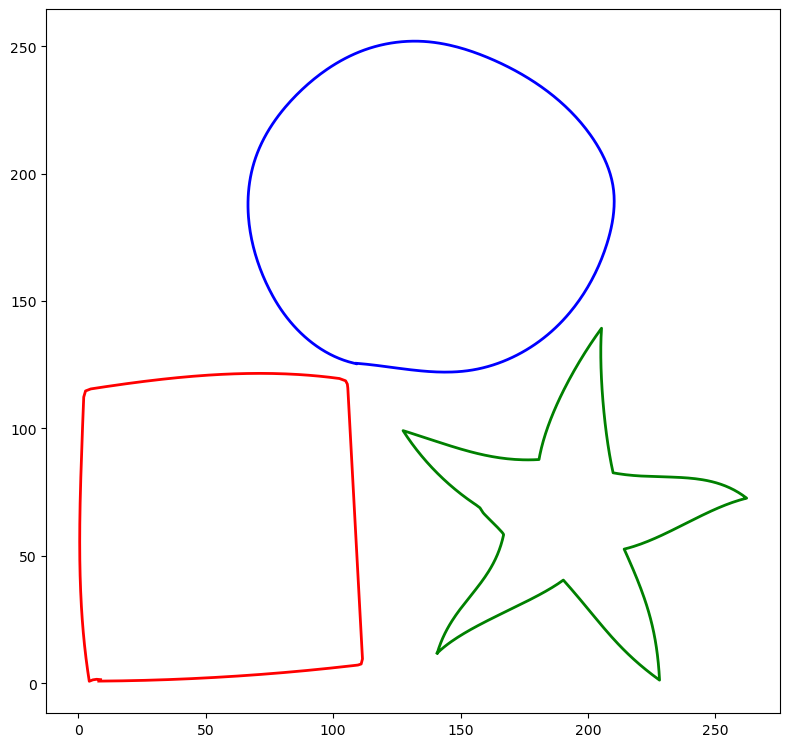

Number of curves: 3


In [31]:
isolation_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\isolated.csv"
plot_shape(isolation_path)

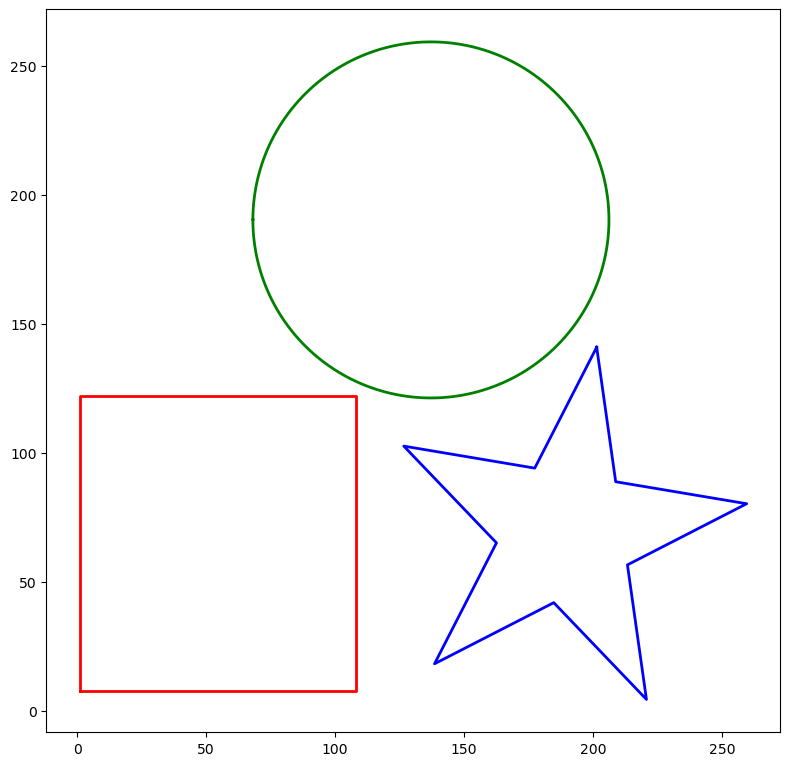

Number of curves: 3


In [33]:
isolation_path_soln = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\isolated_sol.csv"
plot_shape(isolation_path_soln)

#### **Shape Primitives**:
1. **Straight lines.**
2. **Circles and Ellipses.** Look for curves where all points are equidistant from a center (circle) or have two focal points (ellipse).
3. **Rectangles and Rounded Rectangles.** Identify rectangles and distinguish them from rectangles with curved edges.
4. **Regular Polygons.** Identify polygons with equal sides and angles.
5. **Star Shapes.** Identify a star shape from various curves. Look for a central point with multiple radial arms.


All shapes are not regulariable, so Algorithm should first distinguish between regularizable and unregularizable shapes.

#### **Methods for Regular Shape detection:**

1. **Fourier Descriptors**
   - Analyze and represent the shape of closed curves.
   - Determine if the shape approximates a regular form like a circle or an ellipse.

2. **Shape Approximation and Fitting**
   - **Least Squares Fitting:** Fit shapes to regular geometric forms by minimizing the distance between the shape's points and the ideal form.
   - **RANSAC (Random Sample Consensus):** Fit shapes to regular forms by iteratively selecting random subsets of points and fitting models to these subsets.

3. **Symmetry Detection**
   - Detect symmetries in shapes as an indicator of regularity.
   - Use algorithms like the Hough Transform to detect lines of symmetry, aiding in identifying regular shapes like polygons and stars.

4. **Polygon Regularity Check**
   - Verify all sides have equal length.
   - Ensure all internal angles are equal.

5. **Circle and Ellipse Detection**
   - **Circular Hough Transform:** Detect circles in images and verify if a shape is circular.
   - **Ellipse Fitting Algorithms:** Use algorithms like Direct Least Squares Fitting of Ellipses to determine if a shape approximates an ellipse.

6. **Star Shape Detection**
   - Identify a central point with multiple radial arms.
   - Check for multiple radial lines emanating from the center.
   - Verify that the arms are symmetrically arranged.

In [11]:
def plot_by_index(paths_XYs, index):
    if index < 0 or index >= len(paths_XYs):
        raise ValueError("Index out of range")

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    XYs = paths_XYs[index]
    c = colours[index % len(colours)]
    for XY in XYs:
        ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()

### Regular Shape: Circle

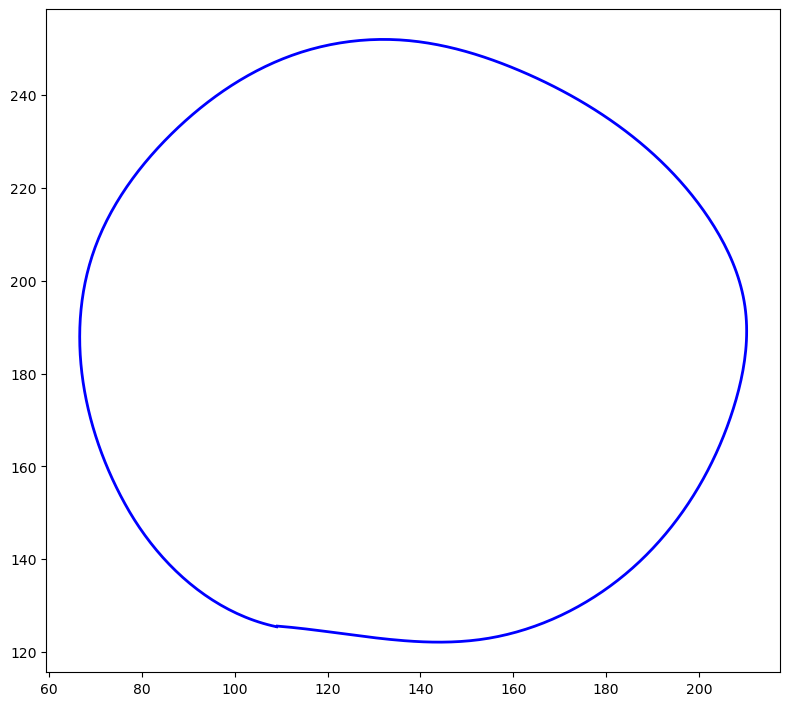

In [44]:
isolation_curve = read_csv(isolation_path)
plot_by_index(isolation_curve, 0)

In [56]:
circle_list = isolation_curve[0][0]
# print(circle_list)
print(len(circle_list))

419


### Compute Distances

Calculate the distance of each point \((x_i, y_i)\) from the origin using the formula:

\[ d_i = \sqrt{x_i^2 + y_i^2} \]

### Calculate Radius

Compute the radius \( r \) as the average of these distances:

\[ r = \frac{1}{n} \sum_{i=1}^n d_i \]

In [61]:
def get_circle(circle_list):
    # calculate circle center using mean
    x, y = zip(*circle_list)
    x_center = np.mean(x)
    y_center = np.mean(y)

    # rearrange points such that origin becomes center
    u = x - x_center
    v = y - y_center

    # get radius by solving least mean squared error 
    distances = np.sqrt(u**2 + v**2)
    radius = np.mean(distances)

    # print(x_center, y_center, radius)
    return x_center, y_center, radius

In [62]:
get_circle(circle_list)

(136.67573383486072, 185.32582203357487, 68.13080926462753)

In [77]:
def plot_original_and_regularized_circle(paths_XYs, index):
    # plot original curve
    if index < 0 or index >= len(paths_XYs):
        raise ValueError("Index out of range")

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    XYs = paths_XYs[index]
    c = colours[index % len(colours)]
    for XY in XYs:
        ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    # plot regularized curve
    circle_list = paths_XYs[index][0]
    x_center, y_center, radius = get_circle(circle_list)
    
    # Create an array of angles for the circle
    theta = np.linspace(0, 2 * np.pi, 100)
    
    # Parametric equations for a circle
    x_circle = x_center + radius * np.cos(theta)
    y_circle = y_center + radius * np.sin(theta)
    
    # Plot the circle and center of circle
    # ax.plot(x_circle, y_circle, label=f'Center: ({x_center}, {y_center}), Radius: {radius}')
    ax.plot(x_circle, y_circle)
    ax.plot(x_center, y_center, 'ro')  # 'ro' for red dot
    # ax.text(x_center, y_center, f'  ({x_center}, {y_center})', fontsize=12, verticalalignment='bottom')

    # Set equal scaling and labels
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('original_and_regularized_circle')
    ax.legend()
    
    # Show plot
    plt.grid(True)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


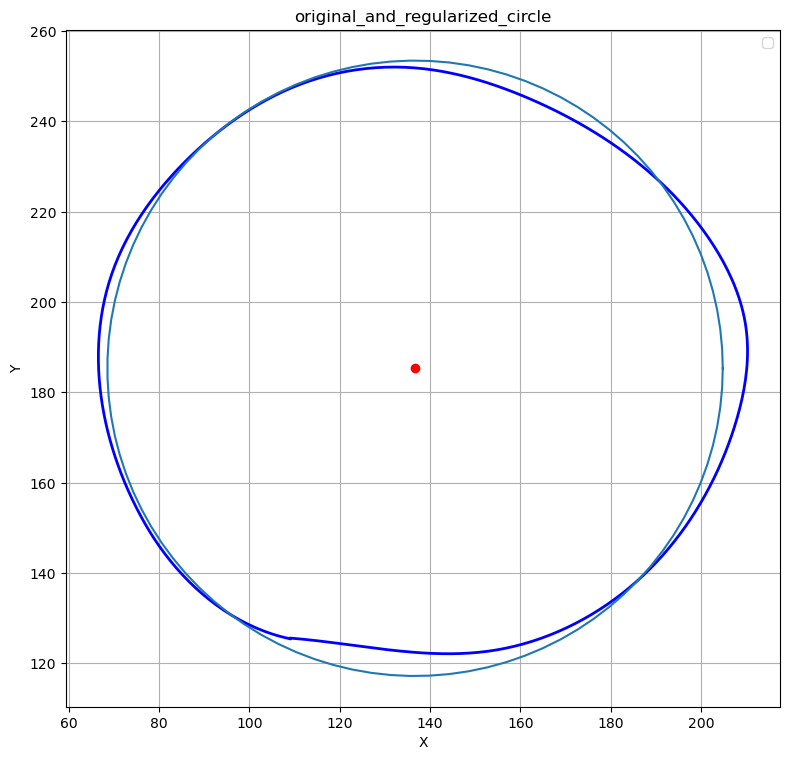

In [ ]:
plot_original_and_regularized_circle(isolation_curve, 0)

In [20]:
# Function to load and use the stored model for prediction
def predict_new_data(X_new, model_path, scaler_path, label_encoder_path):
    """
    Predict the class labels for new data using a stored model.

    Parameters:
    - X_new: New data to predict (list of coordinate lists)
    - model_path: Path to the stored model file
    - scaler_path: Path to the stored scaler file
    - label_encoder_path: Path to the stored label encoder file

    Returns:
    - predictions: Predicted class labels
    """
    # Load the stored model, scaler, and label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    label_encoder = joblib.load(label_encoder_path)

    # Convert new data to numpy array and flatten
    X_new = np.array(X_new, dtype=object)
    max_length = max(len(arr) for arr in X_new)
    X_new_padded = np.array([np.pad(arr, ((0, max_length - len(arr)), (0, 0)), mode='constant').flatten() for arr in X_new])

    # Standardize new data
    X_new_padded = scaler.transform(X_new_padded)

    # Make predictions
    y_pred = model.predict(X_new_padded)
    predictions = label_encoder.inverse_transform(y_pred)

    # Get class-wise probabilities
    probabilities = model.predict_proba(X_new_padded)

    return predictions, probabilities

In [8]:
def adjust_points(points, max_limit=200):
    """
    Adjust the number of (x, y) points to exactly max_limit.
    
    Parameters:
    - points (list or np.array): List of (x, y) coordinates.
    - max_limit (int): Desired number of points.
    
    Returns:
    - np.array: Adjusted list of (x, y) coordinates with exactly max_limit points.
    """
    points = np.array(points)
    num_points = len(points)
    
    if num_points > max_limit:
        # Sample max_limit points uniformly
        indices = np.linspace(0, num_points - 1, max_limit, dtype=int)
        adjusted_points = points[indices]
    elif num_points < max_limit:
        # Duplicate points uniformly
        repeat_factor = np.ceil(max_limit / num_points).astype(int)
        repeated_points = np.tile(points, (repeat_factor, 1))
        indices = np.linspace(0, len(repeated_points) - 1, max_limit, dtype=int)
        adjusted_points = repeated_points[indices]
    else:
        adjusted_points = points
    
    return adjusted_points

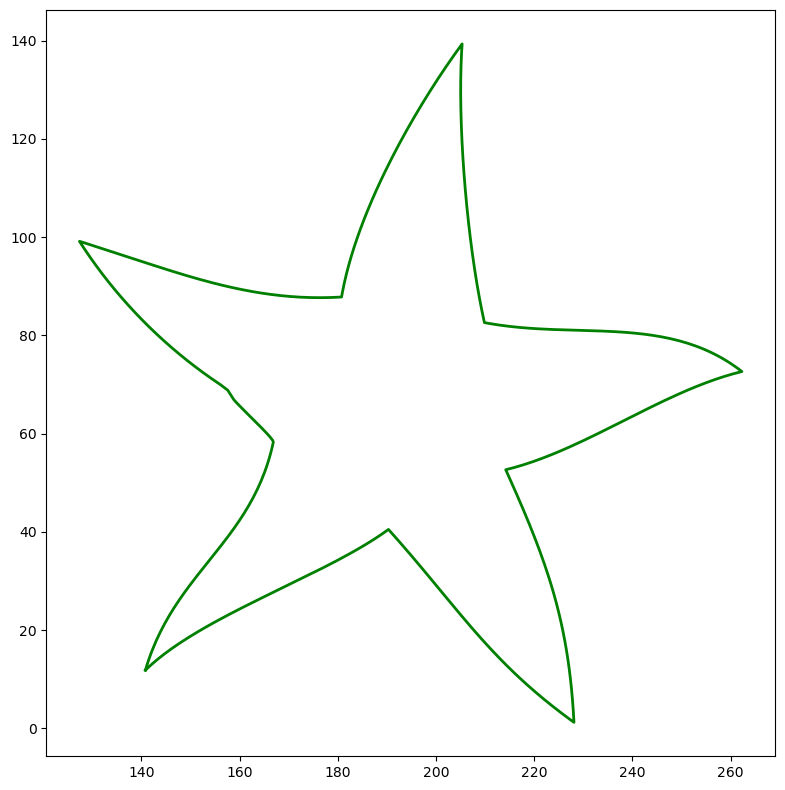

In [13]:
plot_by_index(polyline, 1)

In [18]:
def plot_adjusted_points(adjusted_points):
    """
    Plot the adjusted (x, y) points.
    
    Parameters:
    - adjusted_points (np.array): Adjusted list of (x, y) coordinates.
    """
    if adjusted_points.shape[1] != 2:
        raise ValueError("Points array must have shape (n, 2)")

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    
    ax.scatter(adjusted_points[:, 0], adjusted_points[:, 1], c='b', marker='o')

    ax.set_aspect('equal')
    plt.show()

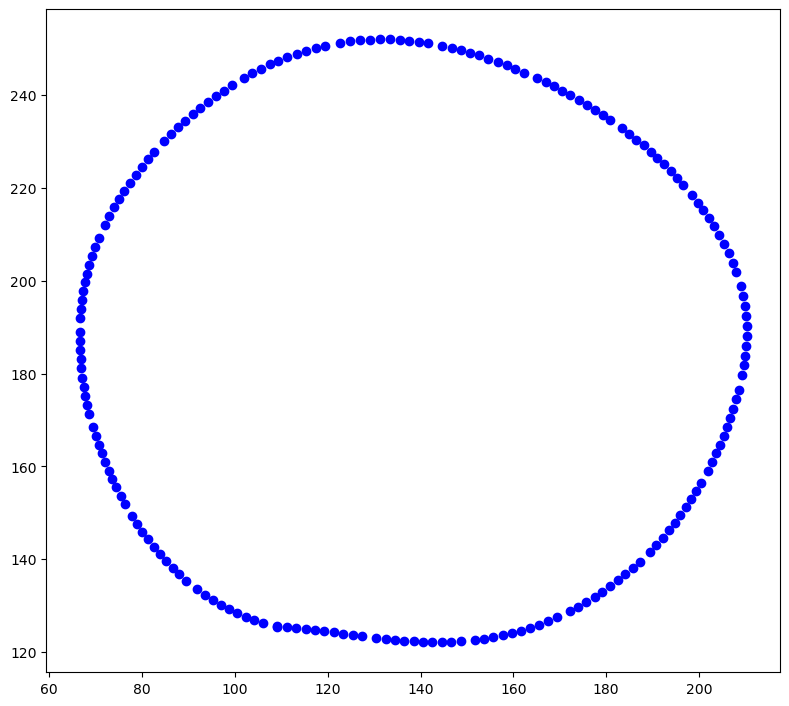

In [19]:
plot_adjusted_points(adjust_points(polyline[0][0]))

In [22]:
import joblib

# Example usage of the prediction function with new data
# X_new = [
#     generate_star().tolist(),  # Example new star shape
#     generate_circle().tolist(),  # Example new circle shape
# ]

isolation_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\isolated.csv"
polyline = read_csv(isolation_path)
X_new = [
    adjust_points(polyline[0][0]),
    adjust_points(polyline[1][0]),
    adjust_points(polyline[2][0])
]

model_path = r'C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\Models\random_forest_model2.joblib'
scaler_path = r'C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\Models\scaler2.joblib'
label_encoder_path = r'C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\Models\label_encoder2.joblib'

predictions, probabilities = predict_new_data(X_new, model_path, scaler_path, label_encoder_path)
print(f"Predictions: {predictions}")
print("Probabilities:", probabilities)

Predictions: ['rectangle' 'rectangle' 'rectangle']
Probabilities: [[0.18 0.13 0.08 0.41 0.2 ]
 [0.07 0.17 0.09 0.51 0.16]
 [0.   0.   0.   1.   0.  ]]


In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def fit_and_plot_ellipse(points):
    # Convert the list of points to a numpy array
    points = np.array(points, dtype=np.float32).reshape(-1, 1, 2)
    
    # Fit an ellipse to the points
    ellipse = cv2.fitEllipse(points)
    
    # Extract ellipse parameters
    center, axes, angle = ellipse
    major_axis, minor_axis = axes
    
    # Create points along the ellipse
    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_points = np.array([
        center[0] + (major_axis / 2) * np.cos(theta) * np.cos(np.radians(angle)) - (minor_axis / 2) * np.sin(theta) * np.sin(np.radians(angle)),
        center[1] + (major_axis / 2) * np.cos(theta) * np.sin(np.radians(angle)) + (minor_axis / 2) * np.sin(theta) * np.cos(np.radians(angle))
    ]).T

    # Plot the original points
    plt.scatter(points[:, 0, 0], points[:, 0, 1], color='red', label='Original Points')
    
    # Plot the fitted ellipse
    plt.plot(ellipse_points[:, 0], ellipse_points[:, 1], color='blue', label='Fitted Ellipse')
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Original Points and Fitted Ellipse')
    plt.show()

    # Calculate the error: distance from each point to the closest point on the ellipse
    distances = cdist(points[:, 0], ellipse_points)
    min_distances = np.min(distances, axis=1)
    mean_error = np.mean(min_distances)

    return ellipse, mean_error

In [24]:
occlusion_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\occlusion1.csv"
occlusion = read_csv(occlusion_path)
plot_shape(occlusion_path)

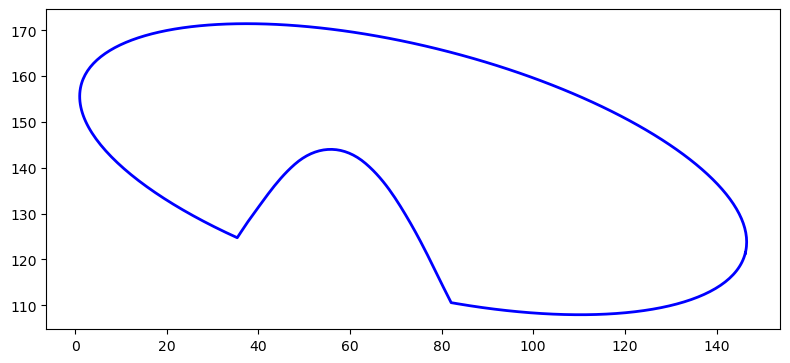

In [25]:
plot_by_index(occlusion, 0)

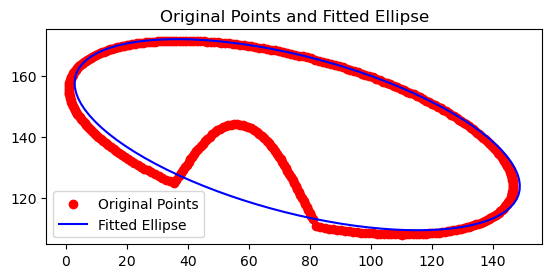

3.680555462617448


In [27]:
ellipse, error = fit_and_plot_ellipse(occlusion[0][0])
print(error)

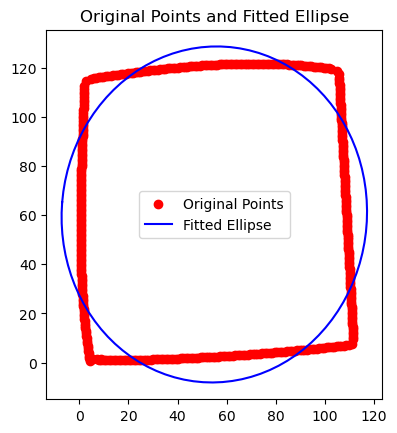

5.737347463961821


In [28]:
ellipse, error = fit_and_plot_ellipse(polyline[2][0])
print(error)

In [32]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Transformation functions
def random_rotation(coords, angle=None):
    if angle is None:
        angle = np.random.uniform(0, 2 * np.pi)
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    return coords @ rotation_matrix.T

def random_translation(coords, max_translation=10):
    translation = np.random.uniform(-max_translation, max_translation, size=(1, 2))
    return coords + translation

def random_scaling(coords, scale_range=(0.5, 1.5)):
    scale = np.random.uniform(*scale_range)
    return coords * scale

def apply_random_transformations(coords):
    coords = random_rotation(coords)
    coords = random_translation(coords)
    coords = random_scaling(coords)
    return coords

# Shape generation functions with random parameters
def generate_straight_line(num_points=200):
    length = np.random.uniform(50, 150)
    noise = np.random.uniform(0, 0.5)
    x = np.linspace(0, length, num=num_points)
    y = np.zeros(num_points)
    y += np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_circle(num_points=200):
    radius = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = radius * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_ellipse(num_points=200):
    a = np.random.uniform(20, 100)
    b = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = a * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = b * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_rectangle(num_points=200):
    width = np.random.uniform(20, 100)
    height = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    # Generate corners
    corners = np.array([
        [0, 0],
        [width, 0],
        [width, height],
        [0, height],
        [0, 0]
    ])
    coords = []
    for i in range(4):
        edge_points = np.linspace(corners[i], corners[i+1], num_points//4)
        coords.extend(edge_points)
    coords = np.array(coords)
    coords += np.random.normal(0, noise, coords.shape)
    return apply_random_transformations(coords)

def generate_regular_polygon(num_points=200):
    sides = np.random.randint(3, 10)
    radius = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    vertices = np.vstack((radius * np.cos(angles), radius * np.sin(angles))).T
    vertices = np.vstack((vertices, vertices[0]))  # Close the polygon
    coords = []
    for i in range(sides):
        edge_points = np.linspace(vertices[i], vertices[i+1], num_points//sides)
        coords.extend(edge_points)
    coords = np.array(coords)
    coords += np.random.normal(0, noise, coords.shape)
    return apply_random_transformations(coords)

def generate_star(num_points=200):
    radius1 = np.random.uniform(25, 100)
    radius2 = np.random.uniform(10, radius1 - 10)
    num_vertices = np.random.randint(5, 11) * 2
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    radii = np.array([radius1 if i % 2 == 0 else radius2 for i in range(num_vertices)])
    vertices = np.vstack((radii * np.cos(angles), radii * np.sin(angles))).T

    coords = []
    points_per_edge = num_points // num_vertices
    for i in range(num_vertices):
        edge_points = np.linspace(vertices[i], vertices[(i + 1) % num_vertices], points_per_edge, endpoint=False)
        coords.extend(edge_points)
    coords = np.array(coords)

    # Add remaining points to ensure total num_points
    remaining_points = num_points - len(coords)
    if remaining_points > 0:
        extra_points = np.linspace(vertices[-1], vertices[0], remaining_points + 1, endpoint=False)[1:]
        coords = np.vstack((coords, extra_points))

    coords += np.random.normal(0, noise, coords.shape)
    return apply_random_transformations(coords)

In [34]:
ellipse2 = generate_ellipse()
print(ellipse2)

[[ 24.23623443 -52.16991264]
 [ 25.68285652 -51.58426634]
 [ 28.18833911 -50.6376862 ]
 [ 29.87488882 -49.16845039]
 [ 31.47491565 -48.04413462]
 [ 33.73143899 -46.64943607]
 [ 35.57917921 -46.00085311]
 [ 37.47665812 -44.08569231]
 [ 38.88097425 -43.59206701]
 [ 40.7523649  -41.64770793]
 [ 42.77675015 -40.90672226]
 [ 44.39699104 -38.68200396]
 [ 45.80274146 -37.51093057]
 [ 47.32025482 -36.09816387]
 [ 49.44758108 -34.72155781]
 [ 50.44103391 -33.15051246]
 [ 51.99509569 -31.56111953]
 [ 53.60676843 -29.9135597 ]
 [ 54.89950134 -28.28748224]
 [ 55.78839017 -26.04176862]
 [ 57.00429523 -25.03442118]
 [ 58.27480392 -22.80686282]
 [ 59.16714709 -21.20728151]
 [ 60.67940127 -19.50745292]
 [ 61.11065633 -17.54209065]
 [ 62.51679558 -15.88655156]
 [ 62.94863424 -13.67824235]
 [ 63.77908058 -11.63424091]
 [ 64.78476305 -10.15378761]
 [ 65.28541396  -8.19095879]
 [ 65.57335906  -6.1348579 ]
 [ 66.42319786  -4.62832517]
 [ 66.86346395  -2.85055752]
 [ 67.34275096  -0.61277551]
 [ 67.88435725

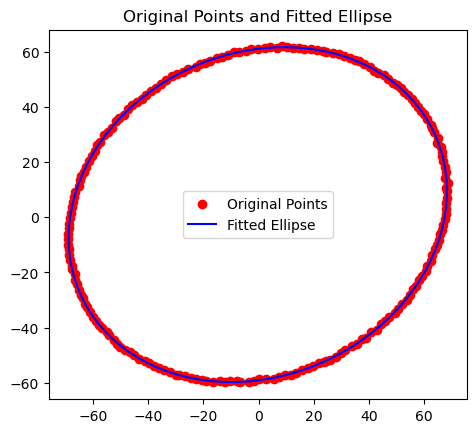

1.06445084871846


In [37]:
ellipse2_fit, error2 = fit_and_plot_ellipse(ellipse2)
print(error2)

In [ ]:
def is_convex(points):
    def cross_product_sign(o, a, b):
        # Vector OA
        vector_oa = (a[0] - o[0], a[1] - o[1])
        # Vector OB
        vector_ob = (b[0] - o[0], b[1] - o[1])
        # Cross product of OA and OB
        cross_product = vector_oa[0] * vector_ob[1] - vector_oa[1] * vector_ob[0]
        return cross_product

    n = len(points)
    if n < 3:
        return False  # A curve with less than 3 points is not well-defined

    signs = []

    for i in range(n):
        o = points[i]
        a = points[(i + 1) % n]
        b = points[(i + 2) % n]
        cross_product = cross_product_sign(o, a, b)
        if cross_product != 0:
            signs.append(cross_product > 0)

    # Check if all signs are the same
    return all(signs) or not any(signs)

## Part2: Fragmented shapes (Shape is made from collection of polylines)

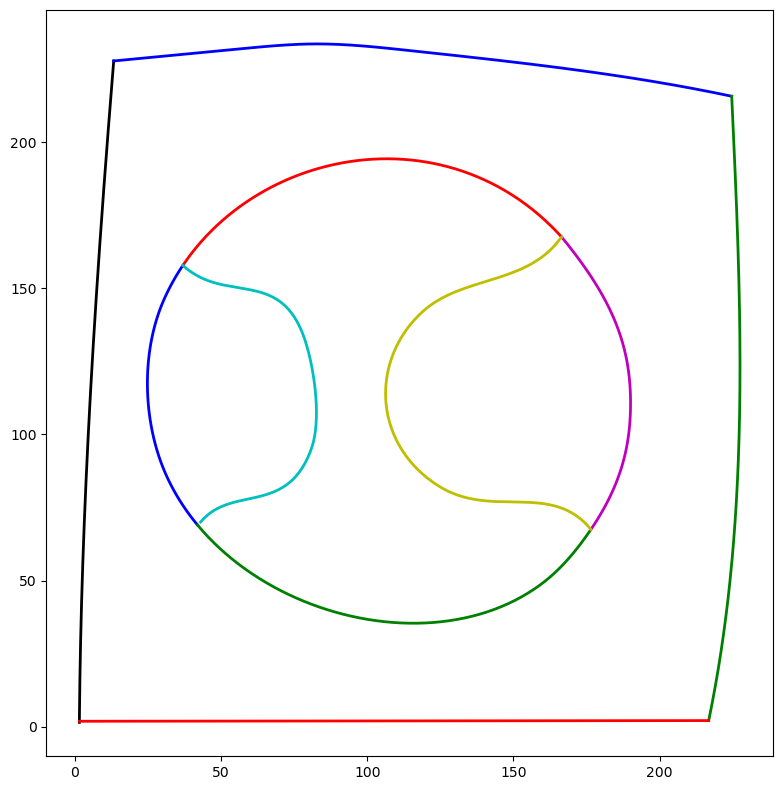

Number of curves: 10


In [34]:
fragmentation_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\frag0.csv"
plot_shape(fragmentation_path)

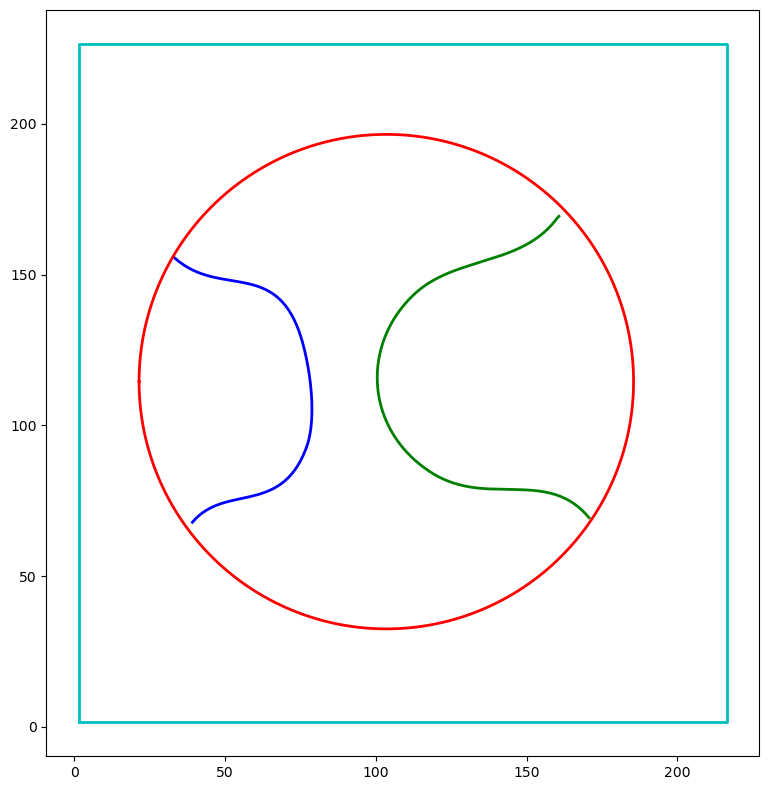

Number of curves: 4


In [35]:
fragmentation_path_soln = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\frag01_sol.csv"
plot_shape(fragmentation_path_soln)

# Task2: Finding Symmetry

#### **Symmetries:** reflection symmetries
1. **Line Symmetry:** 
2. **Radial symmetry:**

Explore more symmetries

#### **Symmetry Hunt:** 
1. Observe that an identical looking curve may be created using different sequence of Bezier curves. 
2. The task is to identify symmetry, it makes sense to transform the presentation as set of points. 
3. In the first stage, identify symmetry under the assumptions, and then try to fit identical Bezier curves on points that are symmetric.

## Part1: Line symmetry (mirror reflection symmetry along line)

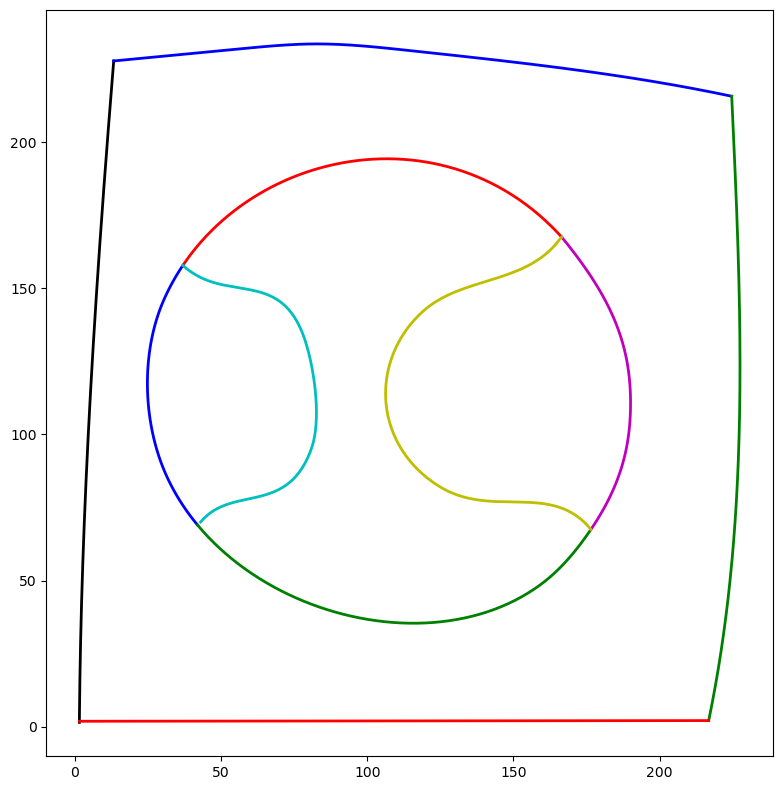

Number of curves: 10


In [36]:
line_symmetry_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\frag0.csv"
plot_shape(line_symmetry_path)

Here, 2 lines of symmetry are present for rectangle : vertical and horizontal (2 diagonal symmetries are absent because, this is rectangle, not a square). Circle has infinite lines of symmetry (so, ignore them???)

## Part2: Radial symmetry

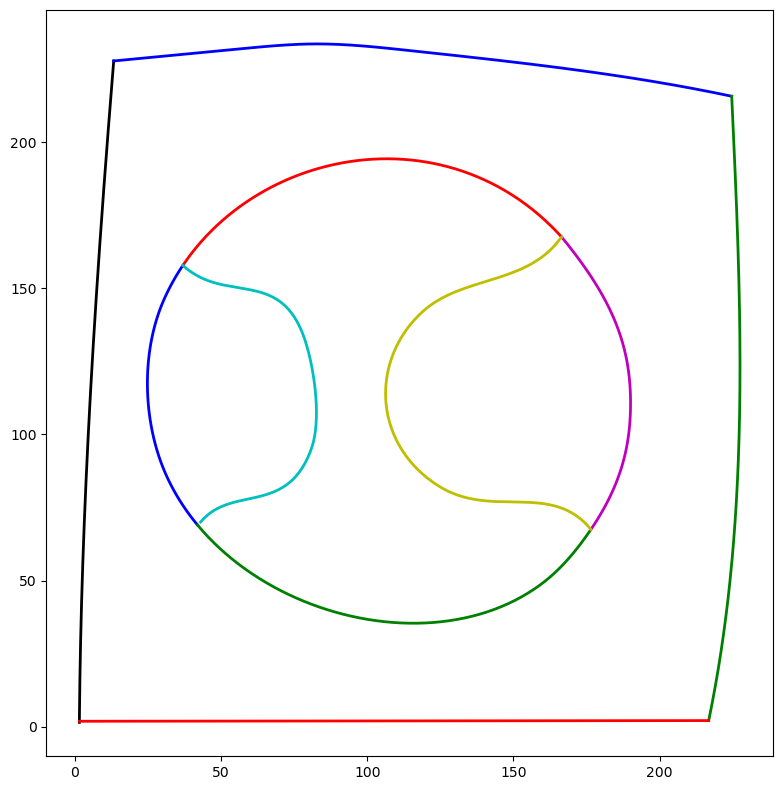

Number of curves: 10


In [37]:
radial_symmetry_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\frag0.csv"
plot_shape(radial_symmetry_path)

Here, 1 radial symmetry is present in Circle.

# Task3: Shape Completion (Occlusion Removal)

Only Curve completion (not object completion)

## Part1: Connected Occlusion (occluding shape partially blocks occluded shape)

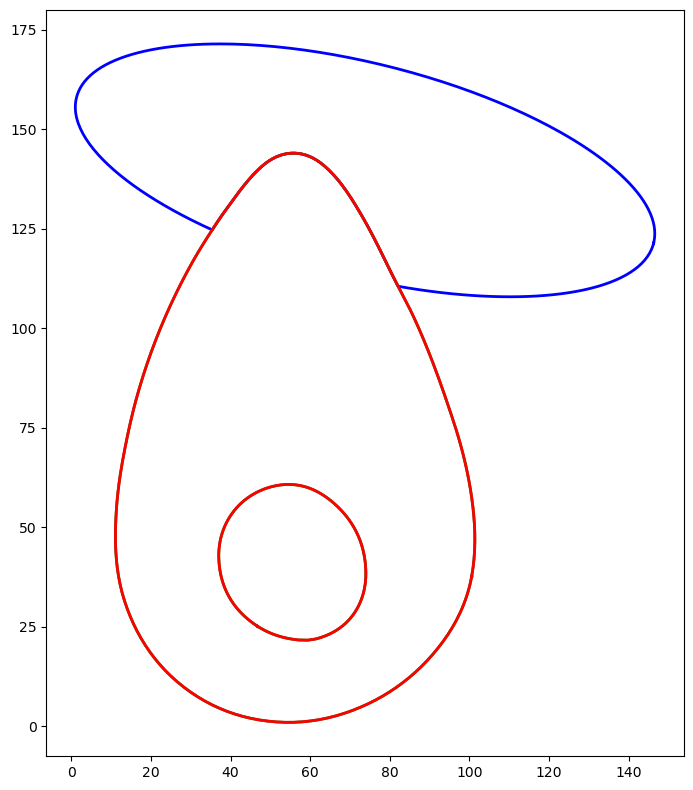

Number of curves: 3


In [38]:
connected_occlusion_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\occlusion1.csv"
plot_shape(connected_occlusion_path)

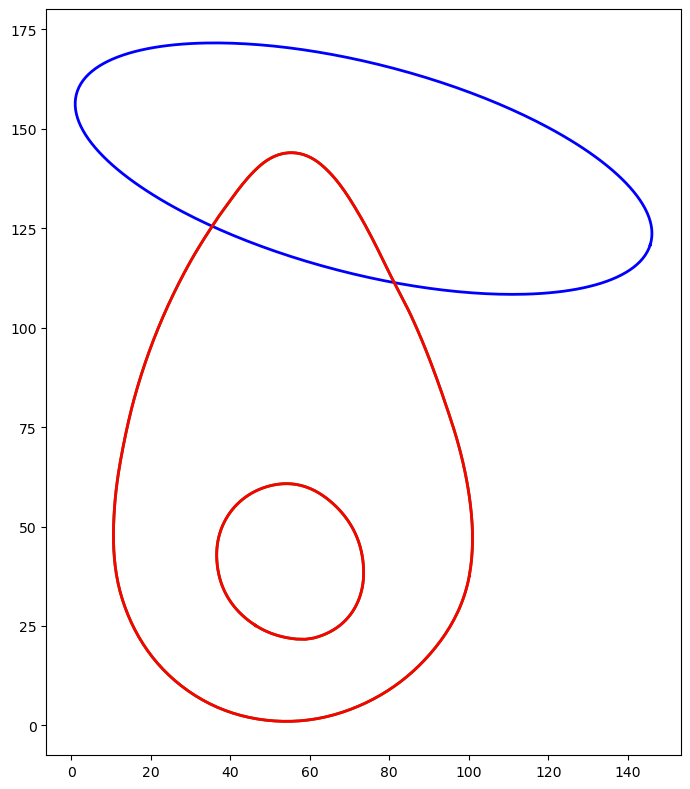

Number of curves: 3


In [39]:
connected_occlusion_path_soln = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\occlusion1_sol.csv"
plot_shape(connected_occlusion_path_soln)

## Part2: Disconnected Occlusion (occluding shape fragments occluded shape into multiple closed paths)

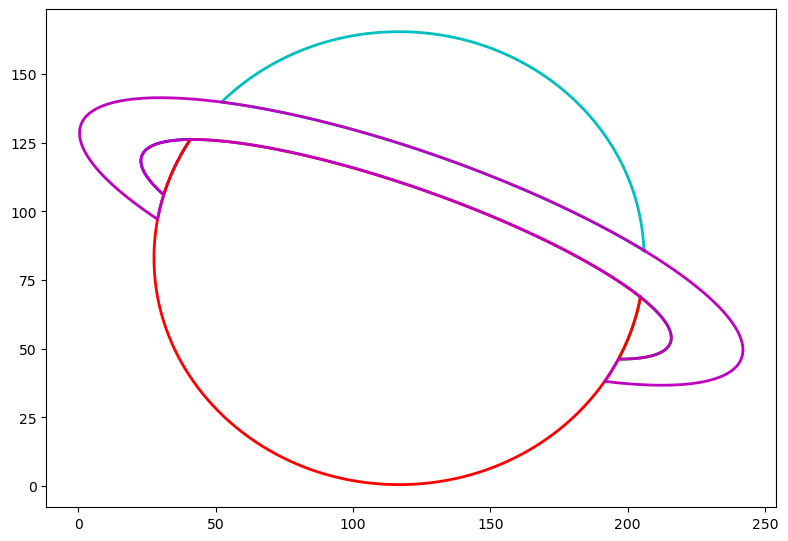

Number of curves: 5


In [40]:
disconnected_occlusion_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\occlusion2.csv"
plot_shape(disconnected_occlusion_path)

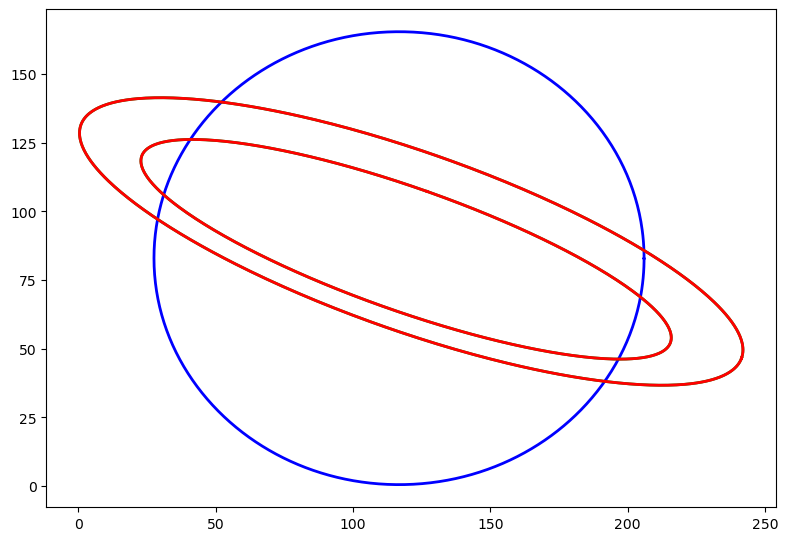

Number of curves: 3


In [41]:
disconnected_occlusion_path_soln = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\occlusion2_sol.csv"
plot_shape(disconnected_occlusion_path_soln)